In [2]:
#loading csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

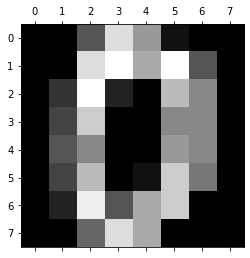

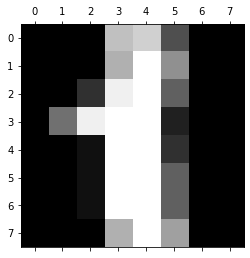

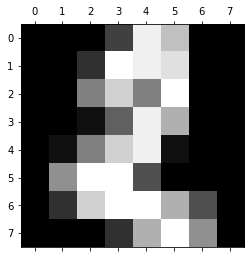

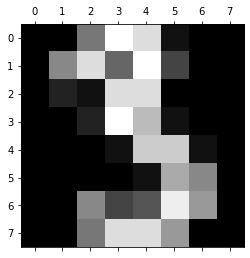

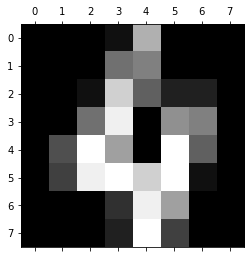

In [3]:
#visualizingthe images of digits
for i in range(5):
    plt.gray()
    plt.matshow(digits.images[i])

In [6]:
#creating data frame of data
df=pd.DataFrame(digits.data)
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
#now creating a good train and test model
from sklearn.model_selection import train_test_split
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [29]:
#calling random forest algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [30]:
#fitting model
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
model.score(x_test,y_test)

0.9722222222222222

In [41]:
model.predict(x_test)

array([2, 1, 7, 6, 5, 5, 6, 7, 0, 3, 3, 3, 1, 8, 6, 8, 4, 5, 1, 5, 0, 9,
       8, 1, 8, 5, 5, 2, 8, 2, 3, 3, 0, 3, 6, 3, 4, 4, 1, 6, 3, 8, 5, 2,
       8, 5, 8, 9, 6, 9, 4, 9, 7, 7, 3, 6, 4, 4, 4, 7, 7, 5, 7, 1, 6, 0,
       1, 9, 8, 3, 4, 1, 3, 0, 9, 8, 6, 2, 2, 5, 6, 6, 5, 2, 1, 0, 0, 8,
       5, 2, 4, 6, 2, 0, 6, 1, 0, 6, 7, 1, 5, 7, 3, 7, 2, 1, 5, 9, 1, 2,
       3, 2, 3, 9, 0, 9, 6, 9, 7, 3, 4, 1, 6, 6, 8, 8, 0, 2, 7, 7, 1, 3,
       8, 7, 4, 4, 2, 6, 4, 3, 0, 3, 2, 0, 3, 9, 3, 3, 8, 8, 5, 2, 0, 3,
       0, 7, 2, 9, 3, 8, 0, 7, 5, 8, 5, 6, 2, 9, 0, 5, 2, 1, 2, 1, 3, 9,
       0, 9, 3, 6, 8, 7, 0, 8, 8, 6, 1, 4, 4, 1, 2, 9, 9, 8, 2, 0, 7, 5,
       0, 1, 9, 9, 6, 7, 6, 1, 7, 5, 7, 7, 2, 8, 8, 1, 4, 4, 1, 7, 2, 2,
       4, 6, 0, 1, 5, 9, 4, 8, 2, 2, 9, 1, 5, 3, 2, 0, 6, 3, 0, 6, 4, 4,
       4, 2, 2, 7, 7, 9, 3, 1, 3, 4, 4, 1, 9, 1, 6, 9, 2, 7, 6, 6, 7, 7,
       0, 7, 1, 7, 3, 3, 8, 2, 0, 2, 7, 2, 7, 6, 2, 7, 4, 9, 2, 1, 6, 6,
       4, 0, 2, 7, 5, 8, 8, 7, 1, 5, 2, 7, 9, 5, 6,

In [42]:
#now finding problem where 3% doesnot get work using confusion matrix
y_predicted=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

In [43]:
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]], dtype=int64)

Text(69.0, 0.5, 'truth')

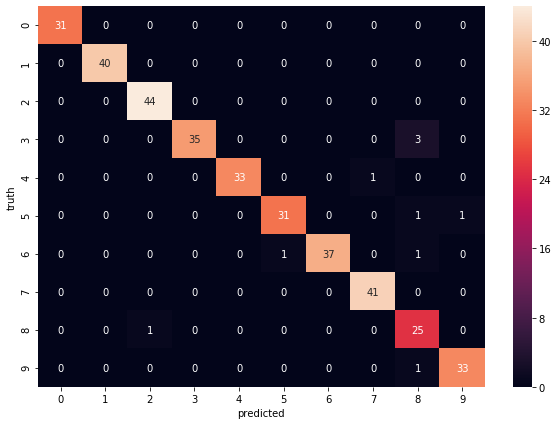

In [47]:
#visualizing cm for better reach
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [48]:
#excercise loading iris flower datasets
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [53]:
#creating iris datasets
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
x=df.drop('target',axis='columns')
y=df.target
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9666666666666667